In [55]:
import requests
import json
import pandas as pd
from pprint import pprint
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vehicle_df = pd.read_csv('vehicles.csv')

C:\Users\lucib\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
vehicle_df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
vehicle_df_final=vehicle_df[['year', 'model','trany', 'city08','displ']]

In [5]:
vehicle_df_final.head()

,year,model,trany,city08,displ
0,1985,Spider Veloce 2000,Manual 5-spd,19,2.0
1,1985,Testarossa,Manual 5-spd,9,4.9
2,1985,Charger,Manual 5-spd,23,2.2
3,1985,B150/B250 Wagon 2WD,Automatic 3-spd,10,5.2
4,1993,Legacy AWD Turbo,Manual 5-spd,17,2.2


In [6]:
print(len(vehicle_df_final))

40789


In [7]:
vehicle_df_final_rename=vehicle_df_final.rename(columns={"year":"Year", "model":"model", "trany":"Transmission", "city08":"mpg", "displ":"Displacement"})

In [8]:
vehicle_df_final_rename['Displacement']=vehicle_df_final["displ"]*1000

In [9]:
vehicle_df_final_rename.head()

,Year,model,Transmission,mpg,Displacement
0,1985,Spider Veloce 2000,Manual 5-spd,19,2000.0
1,1985,Testarossa,Manual 5-spd,9,4900.0
2,1985,Charger,Manual 5-spd,23,2200.0
3,1985,B150/B250 Wagon 2WD,Automatic 3-spd,10,5200.0
4,1993,Legacy AWD Turbo,Manual 5-spd,17,2200.0


# Merging AutoTrader

In [13]:
auto_trader_df = pd.read_csv('max_auto_list.csv')

In [14]:
auto_trader_df.head()

,make,mileage,model,price,vin,year
0,Lexus,"44,190 Miles",RX 350,"$25,998",2T2BK1BA9FC342572,2015
1,Acura,"26,888 Miles",MDX,"$30,998",5FRYD4H44GB033681,2016
2,Toyota,"19,865 Miles",Highlander,"$29,998",5TDJKRFH4GS345488,2016
3,Acura,"24,969 Miles",ILX,"$18,998",19UDE2F71GA017012,2016
4,Toyota,"61,660 Miles",Camry,"$13,998",4T1BF1FK3EU388276,2014


In [18]:
auto_trader_df_rename=auto_trader_df.rename(columns={"year":"Year"})

In [19]:
auto_trader_df_rename.head()

,make,mileage,model,price,vin,Year
0,Lexus,"44,190 Miles",RX 350,"$25,998",2T2BK1BA9FC342572,2015
1,Acura,"26,888 Miles",MDX,"$30,998",5FRYD4H44GB033681,2016
2,Toyota,"19,865 Miles",Highlander,"$29,998",5TDJKRFH4GS345488,2016
3,Acura,"24,969 Miles",ILX,"$18,998",19UDE2F71GA017012,2016
4,Toyota,"61,660 Miles",Camry,"$13,998",4T1BF1FK3EU388276,2014


In [20]:
auto_trader_df_rename.dtypes

make       object
mileage    object
model      object
price      object
vin        object
Year        int64
dtype: object

In [21]:
merged_cars_auto_trader_left=auto_trader_df_rename.merge(vehicle_df_final_rename, on=['Year', 'model'],how='left')

In [22]:
merged_cars_auto_trader_left.head()

,make,mileage,model,price,vin,Year,Transmission,mpg,Displacement
0,Lexus,"44,190 Miles",RX 350,"$25,998",2T2BK1BA9FC342572,2015,Automatic (S6),18.0,3500.0
1,Acura,"26,888 Miles",MDX,"$30,998",5FRYD4H44GB033681,2016,NaN,NaN,NaN
2,Toyota,"19,865 Miles",Highlander,"$29,998",5TDJKRFH4GS345488,2016,NaN,NaN,NaN
3,Acura,"24,969 Miles",ILX,"$18,998",19UDE2F71GA017012,2016,Automatic (AM8),25.0,2400.0
4,Toyota,"61,660 Miles",Camry,"$13,998",4T1BF1FK3EU388276,2014,Automatic (S6),25.0,2500.0


In [23]:
print(len(merged_cars_auto_trader_left))

7141


In [26]:
# Transform the list_price type
i= 0
for item_price in merged_cars_auto_trader_left['price']:
   if item_price == '0':
        item_price = int(price)
        merged_cars_auto_trader_left.loc[i,'price'] = item_price
   else:
        item_price = int(item_price.replace('$','').replace(',','').replace('.',' ').split()[0])
        merged_cars_auto_trader_left.loc[i,'price'] = item_price
   i+=1

In [27]:
merged_cars_auto_trader_left.head()

,make,mileage,model,price,vin,Year,Transmission,mpg,Displacement
0,Lexus,"44,190 Miles",RX 350,25998,2T2BK1BA9FC342572,2015,Automatic (S6),18.0,3500.0
1,Acura,"26,888 Miles",MDX,30998,5FRYD4H44GB033681,2016,NaN,NaN,NaN
2,Toyota,"19,865 Miles",Highlander,29998,5TDJKRFH4GS345488,2016,NaN,NaN,NaN
3,Acura,"24,969 Miles",ILX,18998,19UDE2F71GA017012,2016,Automatic (AM8),25.0,2400.0
4,Toyota,"61,660 Miles",Camry,13998,4T1BF1FK3EU388276,2014,Automatic (S6),25.0,2500.0


In [38]:
i=0
for mileage_value in merged_cars_auto_trader_left['mileage']:
    merged_cars_auto_trader_left.loc[i,'mileage'] = int(mileage_value.split(" ")[0].replace(',',''))
    i+=1

In [42]:
merged_cars_auto_trader_left.dtypes

make             object
mileage           int64
model            object
price             int64
vin              object
Year              int64
Transmission     object
mpg             float64
Displacement    float64
dtype: object

In [43]:
merged_cars_auto_trader_left['Displacement']=merged_cars_auto_trader_left['Displacement']/1000

In [44]:
merged_cars_auto_trader_left.head()

,make,mileage,model,price,vin,Year,Transmission,mpg,Displacement
0,Lexus,44190,RX 350,25998,2T2BK1BA9FC342572,2015,Automatic (S6),18.0,3.5
1,Acura,26888,MDX,30998,5FRYD4H44GB033681,2016,NaN,NaN,NaN
2,Toyota,19865,Highlander,29998,5TDJKRFH4GS345488,2016,NaN,NaN,NaN
3,Acura,24969,ILX,18998,19UDE2F71GA017012,2016,Automatic (AM8),25.0,2.4
4,Toyota,61660,Camry,13998,4T1BF1FK3EU388276,2014,Automatic (S6),25.0,2.5


In [46]:
merged_cars_auto_trader_left.to_csv("auto_trader_mpgdata.csv", 
                  encoding="utf-8", index=False, header=True)

In [47]:
auto_trader_clean_mpg=merged_cars_auto_trader_left.dropna()

In [48]:
col=['make', 'Year', 'mpg', 'Displacement','price']
auto_trader_clean_mpg=auto_trader_clean_mpg[col]

In [49]:
auto_trader_clean_mpg.head()

,make,Year,mpg,Displacement,price
0,Lexus,2015,18.0,3.5,25998
3,Acura,2016,25.0,2.4,18998
4,Toyota,2014,25.0,2.5,13998
5,Toyota,2014,21.0,3.5,13998
6,Hyundai,2015,26.0,1.6,10998


In [51]:
auto_trader_clean_mpg.to_csv("auto_trader__clean_mpgdata1.csv", 
                  encoding="utf-8", index=False, header=True)

(array([1.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 4.000e+00, 6.400e+01,
        4.640e+02, 1.615e+03, 2.575e+03, 3.120e+02]),
 array([2000. , 2001.9, 2003.8, 2005.7, 2007.6, 2009.5, 2011.4, 2013.3,
        2015.2, 2017.1, 2019. ]),
 <a list of 10 Patch objects>)

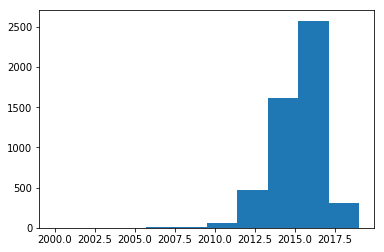

In [57]:
plt.hist(auto_trader_clean_mpg['Year'], bins=10)

In [59]:
auto_trader_clean_mpg_2015=auto_trader_clean_mpg.loc[auto_trader_clean_mpg['Year']==2015]

In [60]:
auto_trader_clean_mpg_2015.head()

,make,Year,mpg,Displacement,price
0,Lexus,2015,18.0,3.5,25998
6,Hyundai,2015,26.0,1.6,10998
7,Hyundai,2015,27.0,1.6,10998
15,Audi,2015,23.0,3.0,26998
16,Audi,2015,20.0,2.0,26998


In [63]:
auto_trader_clean_mpg_2015.dtypes

make             object
Year              int64
mpg             float64
Displacement    float64
price             int64
dtype: object

In [61]:
print(len(auto_trader_clean_mpg_2015))

1191


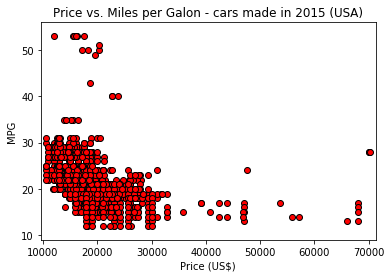

<Figure size 432x288 with 0 Axes>

In [118]:
plt.scatter(auto_trader_clean_mpg_2015['price'], auto_trader_clean_mpg_2015['mpg'], marker="o", facecolors="red", edgecolors="black")
plt.xlim(min(auto_trader_clean_mpg_2015['price'])-1000,max(auto_trader_clean_mpg_2015['price'])+1000)
plt.ylim(min(auto_trader_clean_mpg_2015['mpg'])-3,max(auto_trader_clean_mpg_2015['mpg'])+3)
plt.title("Price vs. Miles per Galon - cars made in 2015 (USA)")
plt.xlabel ("Price (US$)")
plt.ylabel ("MPG")
plt.show()
plt.savefig("auto_trader_price2015_MPG.png")

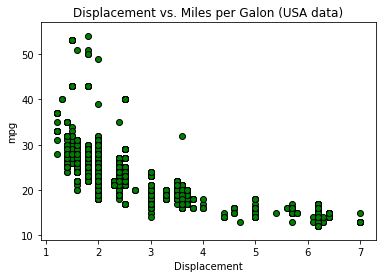

<Figure size 432x288 with 0 Axes>

In [119]:
plt.scatter(auto_trader_clean_mpg['Displacement'], auto_trader_clean_mpg['mpg'], marker="o", facecolors="green", edgecolors="black")
plt.xlim(min(auto_trader_clean_mpg['Displacement'])-0.3,max(auto_trader_clean_mpg['Displacement'])+0.3)
plt.ylim(min(auto_trader_clean_mpg['mpg'])-3,max(auto_trader_clean_mpg['mpg'])+3)
plt.title("Displacement vs. Miles per Galon (USA data)")
plt.xlabel ("Displacement")
plt.ylabel ("mpg")
plt.show()
plt.savefig("auto_trader_displacement_MPG.png")

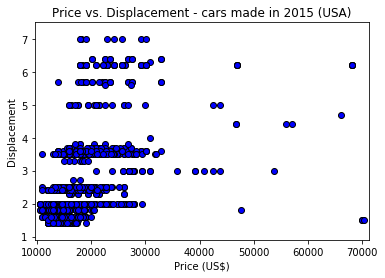

<Figure size 432x288 with 0 Axes>

In [123]:
plt.scatter(auto_trader_clean_mpg_2015['price'], auto_trader_clean_mpg_2015['Displacement'], marker="o", facecolors="blue", edgecolors="black")
plt.xlim(min(auto_trader_clean_mpg_2015['price'])-1000,max(auto_trader_clean_mpg_2015['price'])+1000)
plt.ylim(min(auto_trader_clean_mpg_2015['Displacement'])-0.5,max(auto_trader_clean_mpg_2015['Displacement'])+0.5)
plt.title("Price vs. Displacement - cars made in 2015 (USA)")
plt.xlabel ("Price (US$)")
plt.ylabel ("Displacement")

plt.show()
plt.savefig("auto_trader_price2015_displacement.png")

In [98]:
mpg_avg = auto_trader_clean_mpg.groupby('make')['mpg'].mean()

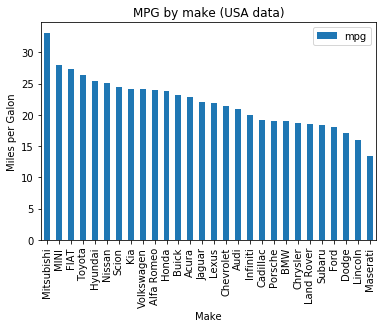

In [121]:
mpg_avg_frame = mpg_avg.to_frame()
sorted_mpg_avg_frame=mpg_avg_frame.sort_values("mpg", ascending=False)
sorted_mpg_avg_frame.plot(kind = 'bar',title = 'MPG by make (USA data)')
plt.ylabel ("Miles per Galon")
plt.xlabel ("Make")
plt.savefig("auto_trader_make_MPG.png")

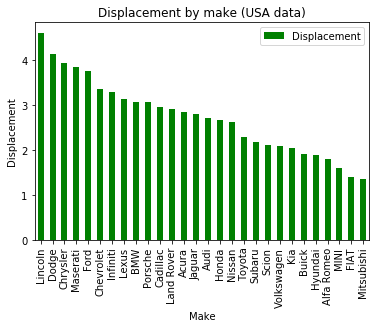

In [122]:
displ_avg = auto_trader_clean_mpg.groupby('make')['Displacement'].mean()
displ_avg_frame = displ_avg.to_frame()
sorted_displ_avg_frame=displ_avg_frame.sort_values("Displacement", ascending=False)
sorted_displ_avg_frame.plot(kind = 'bar',title = 'Displacement by make (USA data)', color="green")
plt.ylabel ("Displacement")
plt.xlabel ("Make")
plt.savefig("auto_trader_make_displacement.png")

In [ ]:
x_axis=(np.arange(len((auto_trader_clean_mpg['make']).unique())))
plt.bar(x_axis, auto_trader_clean_mpg_2015['mpg'], marker="o", facecolors="blue", edgecolors="black")

plt.xlim(min(auto_trader_clean_mpg_2015['price'])-1000,max(auto_trader_clean_mpg_2015['price'])+1000)
plt.ylim(min(auto_trader_clean_mpg_2015['Displacement'])-3,max(auto_trader_clean_mpg_2015['Displacement'])+3)
plt.title("Price vs. Displacement in 2015 (USA)")
plt.xlabel ("Price (US$)")
plt.ylabel ("Displacement")
plt.show()

In [96]:
print(np.arange(len((auto_trader_clean_mpg['make']).unique())))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


In [73]:
auto_trader_clean_mpg_2015['make'].unique()

array(['Lexus', 'Hyundai', 'Audi', 'Honda', 'Nissan', 'FIAT', 'Toyota',
       'Cadillac', 'Chrysler', 'Acura', 'Buick', 'Chevrolet',
       'Volkswagen', 'Ford', 'Kia', 'Dodge', 'Alfa Romeo', 'Infiniti',
       'BMW', 'Land Rover', 'Jaguar', 'Maserati', 'Scion'], dtype=object)

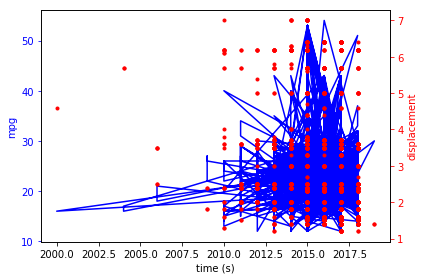

In [84]:
fig, ax1 = plt.subplots()

#set the x-axis
t = auto_trader_clean_mpg['Year']

#set the first y-axis
s1 = auto_trader_clean_mpg['mpg']
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('mpg', color='b')
ax1.tick_params('y', colors='b')

#set the second y-axis
ax2 = ax1.twinx()
s2 = auto_trader_clean_mpg['Displacement']
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('displacement', color='r')
ax2.tick_params('y', colors='r')

#plot it
fig.tight_layout()
plt.show()